In [6]:
import numpy as np
import matplotlib.pylab as plt

import CircularRealFunction as cf

# Obtain Fourier modes from PRC data points

Any $2\pi$-periodic real function $f$ can be written in terms of its Fourier components $a_k$ and $b_k$:

$
\begin{align}
    f(t) 
    &= \frac{a_0}{2} + \sum_{k=1}^\infty (a_k \cos(kt) + b_k sin(kt)) 
    &= f_0 + 2\sum_{k=1}^\infty (\Re(f_k) \cos(kt) + \Im(f_k) sin(kt))
\end{align}
$

that can be approximated by truncating the sum at some positive integer $M$. Then, $2M+1$ coefficients determine the whole function. If $N>2M+1$ samples of the function are availabe, they can be found by solving a over-determined set of linear equations and minimizing the error of least squares:

$
\begin{pmatrix}
f(t_1) \\
\vdots \\
f(t_N)
\end{pmatrix}
= 
\begin{pmatrix}
1 & 2\cos(t_1) & 2\sin(t_1) & \dots & 2\cos(Mt_1) & 2\sin(Mt_1) \\
     \vdots & \vdots    & \vdots    &       & \vdots     & \vdots     \\
1 & 2\cos(t_N) & 2\sin(t_N) & \dots & 2\cos(Mt_N) & 2\sin(Mt_N) \\
\end{pmatrix}
\cdot
\begin{pmatrix}
f_0 \\
\Re(f_1) \\
\Im(f_1) \\
\vdots \\
\Re(f_M) \\
\Im(f_M) \\
\end{pmatrix}
$

In [7]:
## import PRC data from file

phi = np.linspace(0, 2*np.pi, 300)
PRC_data = np.exp(0.4*np.cos(4*phi) + np.sin(phi))

Z = cf.CircularRealFunction()
Z.set_from_data(phi, PRC_data, MAX_MODE_NUMBER=10)

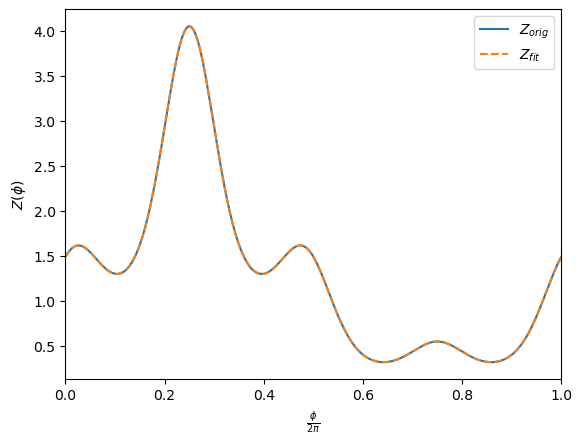

In [8]:
plt.plot(phi/(2*np.pi), PRC_data,   label=r'$Z_{orig}$')
plt.plot(phi/(2*np.pi), Z.get_values_at(phi), ls = '--', label=r'$Z_{fit}$')

# x-axis
plt.xlabel(r'$\frac{\phi}{2\pi}$')
plt.xlim(0,1)

# y-axis
plt.ylabel(r'$Z(\phi)$')

plt.legend()
plt.show()

# Shift to certain value

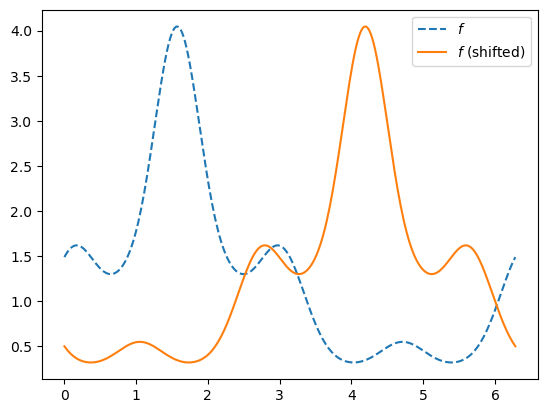

In [10]:
plt.plot(phi, Z.get_values_at(phi), ls = '--', label=r'$f$')

Z.set_zero_at(0.5, direction=-1, guesses=[0., np.pi/2, np.pi])

plt.plot(phi, Z.get_values_at(phi), ls = '-', label=r'$f$ (shifted)')

plt.legend()
plt.show()

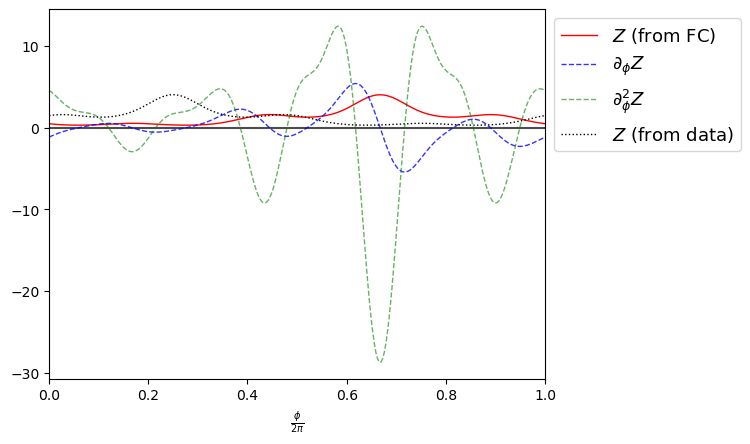

In [11]:
dZ = Z.get_derivative()
ddZ = dZ.get_derivative()

# plot "0"-line
plt.axhline(0, c='k', ls='-', alpha=.7)

# plot PRC and derivatives
plt.plot(phi/(2*np.pi), Z.get_values_at(phi),  'r-',   lw=1, alpha=1.0, label=r'$Z$ (from FC)' )
plt.plot(phi/(2*np.pi), dZ.get_values_at(phi),  'b--', lw=1, alpha=0.8, label=r'$\partial_\phi Z$' )
plt.plot(phi/(2*np.pi), ddZ.get_values_at(phi), 'g--', lw=1, alpha=0.6, label=r'$\partial^2_\phi Z$' )

# type function name manually
plt.plot(phi/(2*np.pi), PRC_data,  'k:',   lw=1, alpha=1.0, label=r'$Z$ (from data)')

# x-axis
plt.xlabel(r'$\frac{\phi}{2\pi}$')
plt.xlim(0,1)

# show plot
plt.legend(fontsize=13, bbox_to_anchor=(1,1), loc='upper left')
#plt.savefig('./graphs/van_der_Pol/PRC.pdf', bbox_inches=tight)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

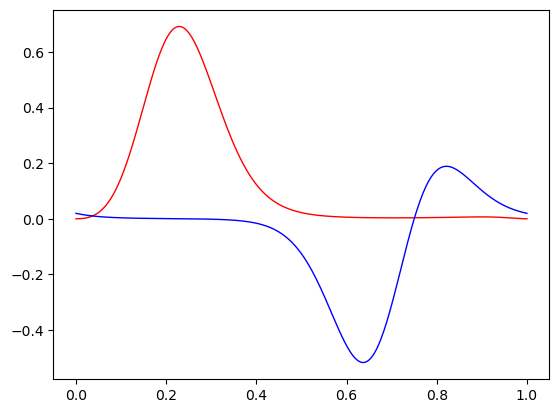

In [12]:
# PRC type I used with phi_0 = 0.0*np.pi
def PRC_I_test(phi, phi_0 = np.pi):
    return (1. - np.cos(phi-phi_0)) * np.exp(3. * (np.cos(phi-phi_0 - np.pi / 3.) - 1.))

# PRC type II used with phi_0 = 0.5*np.pi
def PRC_II_test(phi, phi_0 = np.pi):
    return np.cos(phi-phi_0) * np.exp(3. * (np.cos(phi-phi_0 - 1.4 * np.pi) - 1.))

plt.plot(phi/(2*np.pi), PRC_I_test(phi, phi_0=0),  'r',   lw=1, alpha=1.0, label=r'$Z$ (from Vanessa)')
plt.plot(phi/(2*np.pi), PRC_II_test(phi, phi_0=0),  'b',   lw=1, alpha=1.0, label=r'$Z$ (from Vanessa)')
plt.show

# Test routine for multiplication 

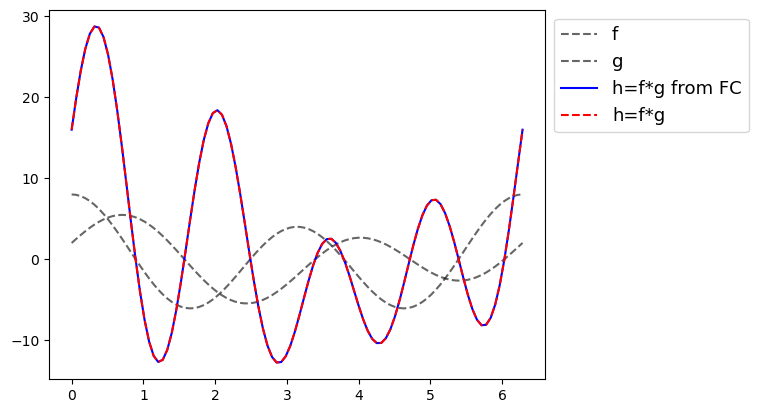

In [13]:
#test multiplication routine

phi = np.linspace(0, 2*np.pi, 100)

f_modes = np.array([0, 1, 2j])
g_modes = np.array([0, 1, 3])

f = cf.CircularRealFunction(FOURIER_MODES = f_modes)
g = cf.CircularRealFunction(FOURIER_MODES = g_modes)

h = f.get_multiplication(g)

plt.plot(phi, f.get_values_at(phi), 'k--', alpha=.6, label='f')
plt.plot(phi, g.get_values_at(phi), 'k--', alpha=.6, label='g')
plt.plot(phi, h.get_values_at(phi), c='b', label='h=f*g from FC')
plt.plot(phi, f.get_values_at(phi)*g.get_values_at(phi), 'r--', label='h=f*g')
plt.legend(fontsize=13, bbox_to_anchor=(1,1), loc='upper left')
plt.show()